<a href="https://colab.research.google.com/github/hal1277/Portfolio/blob/main/creating_window_to_feed_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## starting model refinement and testing in this notebook 

# Import our dependencies
import pandas as pd
from datetime import datetime
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression

# Read in our ramen data
CALI_df= pd.read_csv("City_Zhvi_AllHomes.csv",parse_dates=True)
CALI_df

,Unnamed: 0,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,196258.0,...,659421.0,659007.0,658239.0,656925.0,655613.0,654394.0,653930.0,653901.0,653565.0,652307.0
1,1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,185649.0,...,712660.0,713807.0,715688.0,718245.0,721896.0,725180.0,730358.0,735910.0,744137.0,752508.0
2,2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,93518.0,...,186844.0,187464.0,188070.0,188496.0,189125.0,189612.0,190179.0,190395.0,190938.0,191907.0
3,3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,130920.0,...,248372.0,248646.0,248725.0,248483.0,248278.0,248090.0,248029.0,248220.0,248599.0,249152.0
4,4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,94041.0,...,182732.0,183350.0,183930.0,184846.0,185490.0,186244.0,186420.0,186962.0,187129.0,187718.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27325,27325,48550,29449,Winton,City,MN,MN,Duluth,Saint Louis County,NaN,...,70929.0,70176.0,68979.0,68537.0,68948.0,69481.0,69423.0,69355.0,69654.0,70399.0
27326,27326,51821,29449,Eastabuchie,City,MS,MS,Laurel,Jones County,NaN,...,77737.0,78461.0,79138.0,79930.0,79683.0,79838.0,80272.0,80969.0,81871.0,82284.0
27327,27327,232607,29449,Dean,City,TX,TX,Wichita Falls,Clay County,NaN,...,178872.0,179976.0,180654.0,181188.0,181613.0,182101.0,182424.0,182764.0,182639.0,182361.0
27328,27328,6638,29449,Pulaski,City,GA,GA,NaN,Candler County,NaN,...,97356.0,97757.0,98014.0,98225.0,98303.0,98613.0,98802.0,99227.0,99699.0,100464.0


In [ ]:
top50city = CALI_df[['SizeRank', 'RegionName']].copy()
top50city

,SizeRank,RegionName
0,0,New York
1,1,Los Angeles
2,2,Houston
3,3,Chicago
4,4,San Antonio
...,...,...
27325,29449,Winton
27326,29449,Eastabuchie
27327,29449,Dean
27328,29449,Pulaski


In [ ]:
top50city = top50city.loc[0:49,'RegionName']
top50city

0             New York
1          Los Angeles
2              Houston
3              Chicago
4          San Antonio
5         Philadelphia
6              Phoenix
7            Las Vegas
8            San Diego
9               Dallas
10              Austin
11            San Jose
12        Jacksonville
13        Indianapolis
14       San Francisco
15           Charlotte
16          Fort Worth
17              Tucson
18            Columbus
19          Louisville
20             Orlando
21             El Paso
22             Detroit
23              Denver
24             Seattle
25             Memphis
26              Boston
27          Washington
28            Portland
29           Nashville
30          Sacramento
31           Baltimore
32           Milwaukee
33              Fresno
34               Omaha
35         Albuquerque
36       Oklahoma City
37             Raleigh
38                Mesa
39               Miami
40             Atlanta
41         Kansas City
42    Colorado Springs
43         

In [ ]:
CALI_df=CALI_df[CALI_df["RegionName"]=="New York"]
CALI_df

,Unnamed: 0,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,196258.0,...,659421.0,659007.0,658239.0,656925.0,655613.0,654394.0,653930.0,653901.0,653565.0,652307.0


In [ ]:
## drop unneeded columns
## dropped RegionID, City, State, Metro, CountyName
CALI_df=CALI_df.drop(CALI_df.iloc[:, 1:177],axis = 1)
CALI_df.head()

,Unnamed: 0,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,0,444369.0,444560.0,443163.0,442489.0,442178.0,444115.0,446442.0,447742.0,449016.0,...,659421.0,659007.0,658239.0,656925.0,655613.0,654394.0,653930.0,653901.0,653565.0,652307.0


In [ ]:
##Rename RegionID to zipcode
#CALI_df.rename(columns={"RegionID": 'Zipcode'}, inplace=True)
#CALI_df.head()

In [ ]:
##cast all zipcodes to string from integer
#CALI_df["Zipcode"]=CALI_df["Zipcode"].astype(str)

In [ ]:
## transpose dates to rows
CALI_df=CALI_df.transpose()
CALI_df.head()

,0
Unnamed: 0,0.0
2010-01-31,444369.0
2010-02-28,444560.0
2010-03-31,443163.0
2010-04-30,442489.0


In [ ]:
CALI_df = CALI_df.reset_index()
CALI_df.head()

,index,0
0,Unnamed: 0,0.0
1,2010-01-31,444369.0
2,2010-02-28,444560.0
3,2010-03-31,443163.0
4,2010-04-30,442489.0


In [ ]:
CALI_df = CALI_df.drop([0, 0])
CALI_df

,index,0
1,2010-01-31,444369.0
2,2010-02-28,444560.0
3,2010-03-31,443163.0
4,2010-04-30,442489.0
5,2010-05-31,442178.0
...,...,...
119,2019-11-30,654394.0
120,2019-12-31,653930.0
121,2020-01-31,653901.0
122,2020-02-29,653565.0


In [ ]:
CALI_df.columns = ['date','price']
CALI_df

,date,price
1,2010-01-31,444369.0
2,2010-02-28,444560.0
3,2010-03-31,443163.0
4,2010-04-30,442489.0
5,2010-05-31,442178.0
...,...,...
119,2019-11-30,654394.0
120,2019-12-31,653930.0
121,2020-01-31,653901.0
122,2020-02-29,653565.0


In [ ]:
#CALI_df['date'] = CALI_df['date'].apply(str)

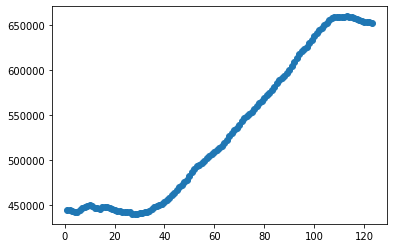

In [ ]:
plt.scatter (CALI_df.index, CALI_df['price'])
plt.show()

In [ ]:
#CALI_df['date'] = pd.to_datetime(CALI_df['date'])
#CALI_df['date'] = CALI_df['date'].strptime('2015-05-13', '%Y-%m-%d')
#CALI_df['date'].strftime('%Y%m%d %H%M%S', t)

In [ ]:
X = CALI_df.index.values.reshape(-1, 1)   #X = CALI_df.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array

#converted X to float values
x = X.astype(float)

Y = CALI_df['price'].values.reshape(-1, 1)   

#converted Y to float values
y = Y.astype(float)   #Y = CALI_df.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x, y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

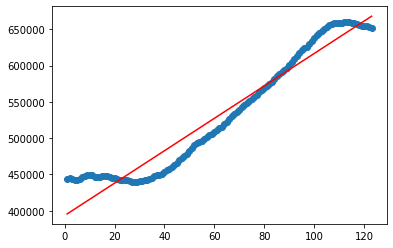

In [ ]:
plt.scatter(x, y)
plt.plot(x, Y_pred, color='red')
plt.show()

In [ ]:
print('intercept:', linear_regressor.intercept_)

intercept: [393493.34186325]


In [ ]:
print('slope:', linear_regressor.coef_)

slope: [[2230.57001715]]


In [ ]:
x_new = np.arange(125).reshape((-1, 1))
#print(x_new)

y_new = linear_regressor.predict(x_new)
y_new[-1][-1]

670084.0239904039